# Aylık Türkiye Enerji Verileri
## Merkez Bankası Verilerini Alma
### Barış Sanlı

Bu kodlarda aylık Türkiye enerji verileri için Merkez Bankası sisteminden veri çekilmesi ve aylık/12 toplamlı verilere grafiklenmesi yer almaktadır

Bu kodu çalıştırmak için **pip install tcmb** yapın


barissanli2@gmail.com

www.barissanli.com

Kodun ham halinden sonra COPILOT ile iyileştirme yapılmıştır. 

In [1]:
#https://github.com/kaymal/tcmb-py
#pip install tcmb
%pylab inline
import pandas as pd

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
#TP.HARICCARIACIK.K5  Enerji (27. Fasıl) İhracat (Milyon ABD doları)
#TP.HARICCARIACIK.K6  Enerji (27. Fasıl) İthalat (Milyon ABD doları)
#TP.HARICCARIACIK.K7  Enerji (27. Fasıl) Net (Milyon ABD doları)
#TP.HARICCARIACIK.K10  Altın ve Enerji Hariç Cari İşlemler Hesabı (Milyon ABD doları)
#TP.HARICCARIACIK.K1  Cari İşlemler Hesabı (Milyon ABD doları)
#TP.FE.OKTG07 fiyat endeksi - Enerji 2.1
#TP.TUFE1YI.T120  4.1.1. Elektrik enerjisinin üretimi iletimi ve dağıtımı
#TP.N2SY05 Sanayi üretim endeksi - Enerji


In [3]:
import tcmb
#burada tcmb EVDS sistemine kayıt olarak API anahtarını alıp ekleyin

API="XXXXXXXXXX"


In [4]:
seri="TP.HARICCARIACIK.K6"
seri="TP.BRENTPETROL.EUBP-7"
client = tcmb.Client(api_key=API)
#client.categories


In [5]:
#data = client.read("TP.BRENTPETROL.EUBP")
data1 = client.read("TP.HARICCARIACIK.K6")
data2 = client.read("TP.HARICCARIACIK.K8")

In [6]:
data3 = client.read("TP.HARICCARIACIK.K7")

In [7]:
data1["k8"]=data2.TP_HARICCARIACIK_K8
data1["k7"]=data3.TP_HARICCARIACIK_K7

In [8]:
data1["sum"]=data1.TP_HARICCARIACIK_K6+data1.k8+data1.k7

In [9]:
data1['YYYY-MM'] = data1.index.strftime('%Y-%m')

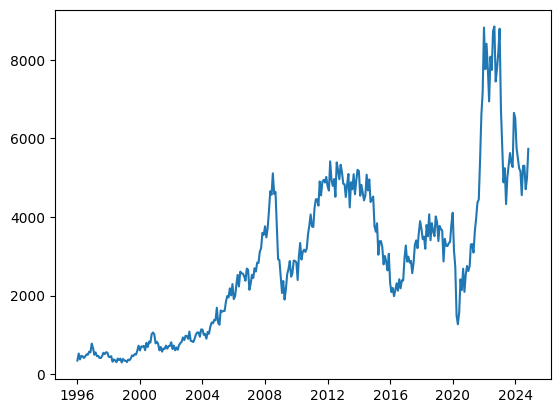

In [10]:
# read one time series
#data = client.read(seri)
plt.plot(data1.TP_HARICCARIACIK_K6)

In [11]:
#client.get_series_metadata(series="TP.YSSK.A1")
seri="TP.HARICCARIACIK.K6"
#seri="TP.BRENTPETROL.EUBP-7"
client.get_series_metadata(seri)

[{'SERIE_CODE': 'TP.HARICCARIACIK.K6',
  'DATAGROUP_CODE': 'bie_hariccariacik',
  'SERIE_NAME': 'Enerji (27. Fasıl) İthalat (Milyon ABD doları)',
  'SERIE_NAME_ENG': 'Energy (Chapter 27) Import (Million USD)',
  'FREQUENCY_STR': 'AYLIK',
  'DEFAULT_AGG_METHOD_STR': 'KÜMÜLATİF',
  'DEFAULT_AGG_METHOD': 'sum',
  'TAG': '',
  'TAG_ENG': '',
  'DATASOURCE': 'TÜİK, TCMB',
  'DATASOURCE_ENG': 'TURKSTAT, CBRT',
  'METADATA_LINK': 'http://www.tcmb.gov.tr/wps/wcm/connect/TR/TCMB+TR/Main+Menu/Istatistikler/Odemeler+Dengesi+ve+Ilgili+Istatistikler/Odemeler+Dengesi+Istatistikleri/',
  'METADATA_LINK_ENG': 'http://www.tcmb.gov.tr/wps/wcm/connect/EN/TCMB+EN/Main+Menu/Statistics/Balance+of+Payments+and+Related+Statistics/Balance+of+Payments+Statisticss/',
  'REV_POL_LINK': 'http://www.tcmb.gov.tr/wps/wcm/connect/TR/TCMB+TR/Main+Menu/Istatistikler/Odemeler+Dengesi+ve+Ilgili+Istatistikler/Odemeler+Dengesi+Istatistikleri/',
  'REV_POL_LINK_ENG': 'http://www.tcmb.gov.tr/wps/wcm/connect/EN/TCMB+EN/Main+Me

In [12]:
# bu kod Copilot ile tekrar düzenlenmiştir 


def plot_monthly_trends(df, year_month_col, value_col, titlex=""):
    # Ensure the 'YearMonth' column is in datetime format
    df[year_month_col] = pd.to_datetime(df.index, format='%Y-%m')
    
    # Extract the year and month
    df['Year'] = df[year_month_col].dt.year
    df['Month'] = df[year_month_col].dt.month
    
    # Get the current year, last year, and the year before last
    current_year = df['Year'].max()
    last_year = current_year - 1
    year_before_last = current_year - 2
    
    # Get month names in Turkish
    month_names = ['Ocak', 'Şubat', 'Mart', 'Nisan', 'Mayıs', 'Haziran', 'Temmuz', 'Ağustos', 'Eylül', 'Ekim', 'Kasım', 'Aralık']

    # Calculate max, min, and average for each month for all years except the current year
    historical_data = df[df['Year'] < current_year]
    monthly_stats = historical_data.groupby('Month')[value_col].agg(['max', 'min', 'mean']).reset_index()
    
    # Pivot data for the current year, last year, and the year before last
    current_year_data = df[df['Year'] == current_year].pivot(index='Month', columns='Year', values=value_col).reset_index()
    last_year_data = df[df['Year'] == last_year].pivot(index='Month', columns='Year', values=value_col).reset_index()
    year_before_last_data = df[df['Year'] == year_before_last].pivot(index='Month', columns='Year', values=value_col).reset_index()

    # Plotting
    fig, ax = plt.subplots(figsize=(12, 6))

    # Plot max-min range as a light gray area
    ax.fill_between(monthly_stats['Month'], monthly_stats['min'], monthly_stats['max'], color='lightgray', alpha=0.5, label='Maksimum-Minimum')

    # Plot average values as a dotted line
    ax.plot(monthly_stats['Month'], monthly_stats['mean'], linestyle=':', color='#999999', linewidth=0.9, label='Ortalama')

    # Plot this year's data
    if not current_year_data.empty:
        ax.plot(current_year_data['Month'], current_year_data[current_year], color='red', linewidth=2.5, label=f' ({current_year})')

        # Annotate current year's values on the red line
        for i, row in current_year_data.iterrows():
            month = row['Month']
            value = row[current_year]
            ax.annotate(f'{value:.2f}', (month, value), textcoords="offset points", xytext=(0, 5), ha='center', fontsize=12, color='black')

    # Plot last year's data
    if not last_year_data.empty:
        ax.plot(last_year_data['Month'], last_year_data[last_year], color='#DD0000', linewidth=0.5, linestyle='-', label=f'Geçen Yıl ({last_year})')

    # Plot the year before last
    if not year_before_last_data.empty:
        ax.plot(year_before_last_data['Month'], year_before_last_data[year_before_last], color='#EE0000', linewidth=0.1, linestyle='-', label=f'Önceki Yıl ({year_before_last})')

    # Set x-axis labels to month names in Turkish
    ax.set_xticks(range(1, 13))
    ax.set_xticklabels(month_names, rotation=45)

    # Labels and title
    ax.set_xlabel('Ay')
    ax.set_ylabel("Milyar $")
    ax.set_title(titlex)
    ax.legend()

    plt.tight_layout()

    plt.savefig("graphs/enerjiithalati_aylik.png",bbox_inches='tight')

    plt.show()


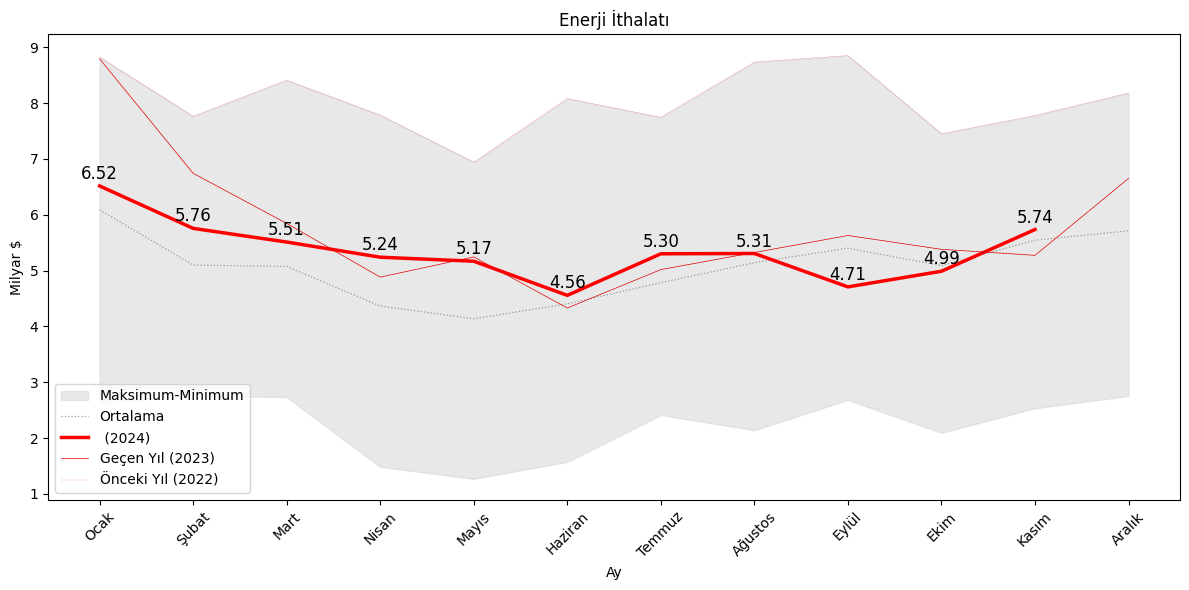

In [13]:
datax=data1[-5*12:].copy()
datax["TP_HARICCARIACIK_K6"]=datax["TP_HARICCARIACIK_K6"]/1000
plot_monthly_trends(datax,"YYYY-MM","TP_HARICCARIACIK_K6", "Enerji İthalatı") 

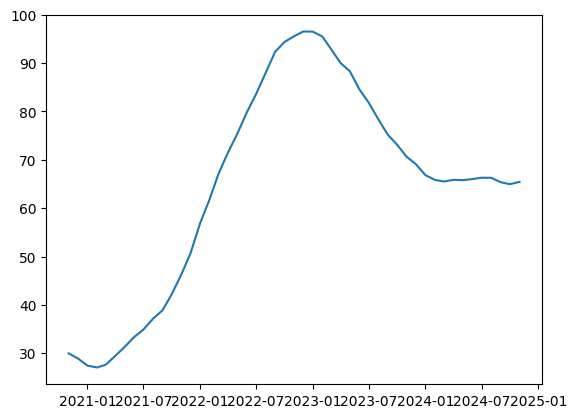

In [14]:
plt.plot(datax.TP_HARICCARIACIK_K6.rolling(12).sum())

In [15]:
#data = tcmb.read("TP.BRENTPETROL.*")

In [16]:
data1.TP_HARICCARIACIK_K6

Tarih
1996-01-01     345.63
1996-02-01     524.03
1996-03-01     374.18
1996-04-01     462.08
1996-05-01     455.92
               ...   
2024-07-01    5300.93
2024-08-01    5306.13
2024-09-01    4707.99
2024-10-01    4988.16
2024-11-01    5735.86
Name: TP_HARICCARIACIK_K6, Length: 347, dtype: float64

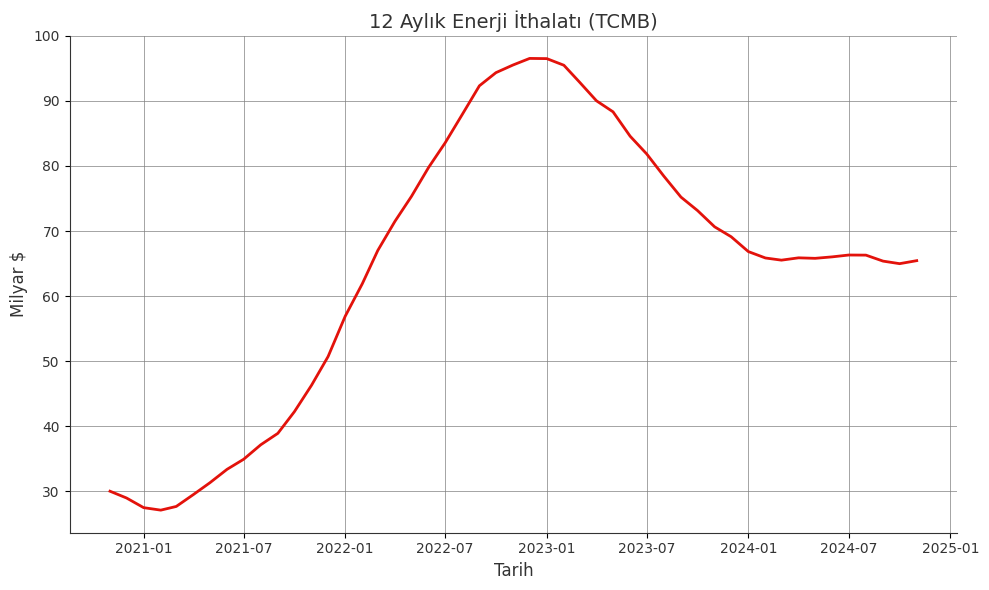

In [17]:


# The Economist's color palette
economist_colors = {
    'red': '#E3120B',
    'dark_blue': '#004B8D',
    'gray': '#777777'
}

# Plot with custom styling
plt.figure(figsize=(10, 6))
plt.plot(datax.index, datax.TP_HARICCARIACIK_K6.rolling(12).sum(), color=economist_colors['red'], linewidth=2)

# Add grid lines
plt.grid(which='major', linestyle='-', linewidth='0.5', color='gray')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='lightgray')

# Customize the axes
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(True)
plt.gca().spines['left'].set_color('#333333')
plt.gca().spines['bottom'].set_color('#333333')

# Customize tick labels
plt.xticks(fontsize=10, color='#333333')
plt.yticks(fontsize=10, color='#333333')

# Add title and labels
plt.title('12 Aylık Enerji İthalatı (TCMB)', fontsize=14, color='#333333')
plt.xlabel('Tarih', fontsize=12, color='#333333')
plt.ylabel('Milyar $', fontsize=12, color='#333333')

# Annotate the last data point
plt.annotate(f'{datax.TP_HARICCARIACIK_K6.iloc[-1]:.1f}', 
             xy=(datax.index[-1], datax.TP_HARICCARIACIK_K6.iloc[-1]), 
             xytext=(datax.index[-1], datax.TP_HARICCARIACIK_K6.iloc[-1] + 5),
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=10, color=economist_colors['red'])

# Show plot
plt.tight_layout()

plt.savefig("graphs/enerjiithalati_12aylik.png",bbox_inches='tight')

plt.show()
